In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go

In [5]:
ads_clients_data = pd.read_csv('ads_clients_data.zip', compression='zip', parse_dates=['date', 'create_date'])

In [10]:
ads_clients_data.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [14]:
ads_data = pd.read_csv('ads_data.zip', compression='zip', parse_dates=['date','time'])

In [15]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


Step 2 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9043/26538/117984/'>link</a>
<br>Для начала посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям. Тонкий момент: помните, что некоторые показываемые объявления не кликались, и при группировке в таких случаях не будет строк с кликами, а для подсчёта среднего по объявлениям их нужно учитывать. Округлите ответы до целых чисел.

In [46]:
pivot_ads = ads_data.groupby(by=['ad_id', 'event'], as_index=False) \
    .agg({'date':'count'}) \
    .rename(columns={'date':'event_counts'}) \
    .pivot(index='ad_id', columns='event', values='event_counts') \
    .fillna(0)

pivot_ads.mean()

event
click    113.137824
view     923.131606
dtype: float64

Step 3 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9043/26538/117985/'>link</a>
<br>Давайте посмотрим на распределение показов объявлений!

По оси x – число показов
По оси y – доля объявлений с такими показами
Прологарифмируйте число показов, а затем постройте такой график, чтобы можно было понять форму распределения. Выберите соответствующий график:

<img src='https://ucarecdn.com/54b16d2c-b0e9-4900-acf6-1745d72108f1/-/crop/1001x569/55,42/-/preview/'/>

In [89]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
)

In [100]:
pivot_ads_w_na = ads_data.groupby(by=['ad_id', 'event'], as_index=False) \
    .agg({'date':'count'}) \
    .rename(columns={'date':'event_counts'}) \
    .pivot(index='ad_id', columns='event', values='event_counts')

C:\Users\psyrnev\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='view', ylabel='Density'>

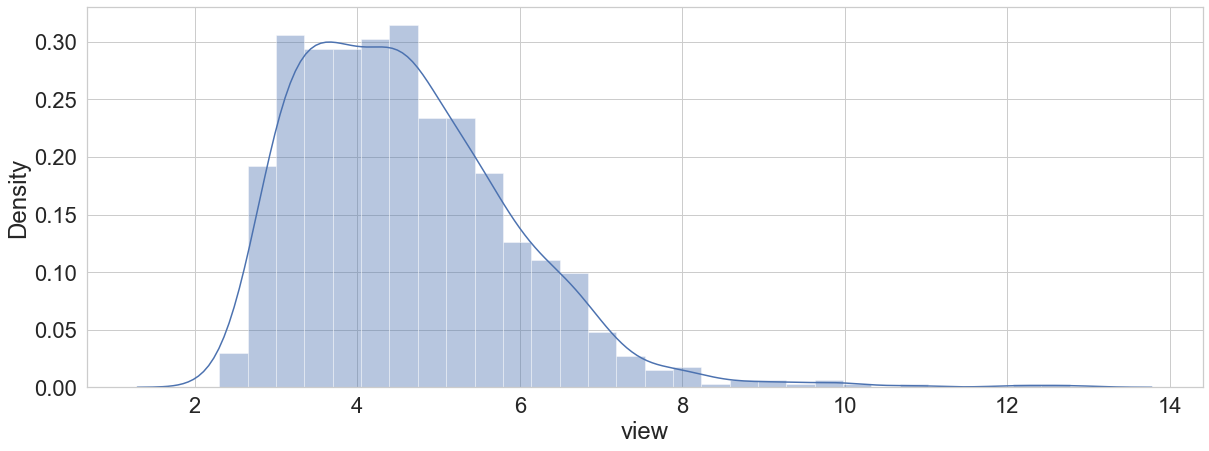

In [102]:
sns.distplot(np.log(pivot_ads_w_na.view))

Step 4 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9043/26538/117986/'>link</a>
<br>Теперь нужно найти среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления, у которых не было показов (обычное среднее). После этого посчитайте скользящее среднее по полученному результату с окном в 2 элемента.

Вопрос: Какое значение скользящего среднего получим за 6 апреля 2019 года? Округлите ответ до целого числа.

In [143]:
# mean_df = ads_data.query('event == "view"') \
#     .groupby(by=['ad_id','date'], as_index=False) \
#     .agg({'time':'count'}) \
#     .rename(columns={'time':'view_count'}) \
#     .groupby(by='date') \
#     .agg({'view_count':'mean'})

mean_df = ads_data.query('event == "view"') \
            .pivot_table(index='ad_id',
                        columns='date',
                        values='time',
                        aggfunc='count'
                        )

mean_df = mean_df.mean()

In [144]:
rolling_df = mean_df.rolling(2).mean().round()

rolling_df

date
2019-04-01      NaN
2019-04-02    146.0
2019-04-03    151.0
2019-04-04    420.0
2019-04-05    798.0
2019-04-06    598.0
dtype: float64

Step 5 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9043/26538/117987/'>link</a>
<br>Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения просто среднего количества показов по дням и скользящего среднего на основе этих данных (которое мы получили в прошлом задании).

Посчитайте, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем. Запишите ответ в формате yyyy-MM-dd

<AxesSubplot:xlabel='date'>

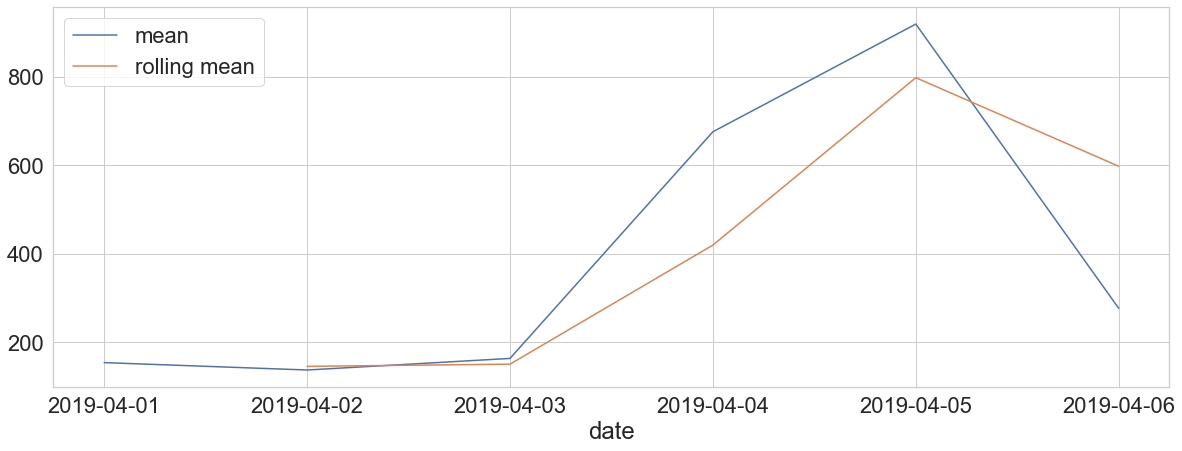

In [147]:
sns.lineplot(data = mean_df, markers=True, palette=['r'], label='mean')
sns.lineplot(data = rolling_df, markers=True, label='rolling mean')

In [153]:
mean_df.subtract(rolling_df).abs().idxmax()

Timestamp('2019-04-06 00:00:00')

Step 6 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9043/26538/117988/'>link</a>
<br>Объедините данные рекламы с данными о рекламных клиентах и найдите среднее количество дней от даты создания рекламного клиента (create_date) и первым запуском рекламного объявления этим клиентом (date).

В качестве ответа укажите среднее число дней.

In [168]:
ads_df = ads_data.groupby(by='client_union_id', as_index=False) \
    .agg({'date':'min'}) \
    .rename(columns={'date':'first_date'}) \
    .merge(ads_clients_data, on='client_union_id')

In [169]:
ads_df.head()

,client_union_id,first_date,date,community_id,create_date
0,1,2019-04-01,2020-05-07,-130371893,2018-12-24
1,9,2019-04-03,2020-05-07,-130215524,2018-12-10
2,13,2019-04-02,2020-05-07,-130623793,2019-01-26
3,16,2019-04-03,2020-05-07,-130748007,2018-12-19
4,20,2019-04-02,2020-05-07,-130189700,2019-03-01


In [170]:
ads_df['diff_date'] = ads_df.create_date.subtract(ads_df.first_date).abs()

In [171]:
ads_df.diff_date.mean()

Timedelta('124 days 09:04:43.532219570')

Step 7 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9043/26538/117989/'>link</a>
<br>💀 Сложное задание! 💀

Давайте вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.

Конверсия – отношение числа клиентов, которые совершили целевое действие (создали рекламу), к общему числу клиентов. Например, 1000 клиентов создали кабинет, но лишь 50 из них запустили рекламу. В таком случае конверсия будет равна

50 / 1000 ∗ 100=5%

Чтобы отобрать данные за нужный промежуток, можно воспользоваться сравнением времени до создания первой рекламы с pd.Timedelta(365, unit='day'))

Ответ дайте в процентах и округлите до сотых. Пример ответа:34.69

In [180]:
total_clients = ads_clients_data.client_union_id.nunique()

In [189]:
ads_up_365 = ads_df[ads_df.diff_date <= pd.Timedelta(365, unit='day')]
launch_ads_in_365 =ads_up_365.client_union_id.nunique()

In [190]:
np.round(launch_ads_in_365 / total_clients * 100, 2)

0.69

Step 8 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9043/26538/117990/'>link</a>
<br>Давайте разобъем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления.

Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней). Список промежутков дней для метода pd.cut() – [0, 30, 90, 180, 365]. Создать временные промежутки можно с помощью pd.to_timedelta().

In [192]:
days = [pd.to_timedelta(d, unit='day') for d in [0, 30, 90, 180, 365]]
labels = ['1month', '3month', '6month', 'year']

In [193]:
ads_df['diff_cut'] = pd.cut(ads_up_365.diff_date, bins=days, labels=labels)

In [194]:
ads_df.head()

,client_union_id,first_date,date,community_id,create_date,diff_date,diff_cut
0,1,2019-04-01,2020-05-07,-130371893,2018-12-24,98 days,6month
1,9,2019-04-03,2020-05-07,-130215524,2018-12-10,114 days,6month
2,13,2019-04-02,2020-05-07,-130623793,2019-01-26,66 days,3month
3,16,2019-04-03,2020-05-07,-130748007,2018-12-19,105 days,6month
4,20,2019-04-02,2020-05-07,-130189700,2019-03-01,32 days,3month


In [198]:
#ads_df.query('diff_cut == "1month"').client_union_id.nunique()
count_clients = ads_df.groupby(by='diff_cut') \
    .agg({'client_union_id':'nunique'})

count_clients

,client_union_id
diff_cut,
1month,11
3month,263
6month,396
year,168


Step 9 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9043/26538/117991/'>link</a>
<br>И последнее задание: постройте интерактивный барплот, на котором будут показаны категории с количеством уникальных клиентов в них (то, что у вас получилось на прошлом степе, по запуску первого рекламного объявления). Расположите их так, чтобы внизу была самая малочисленная, а наверху – самая большая.

In [203]:
fig = go.Figure(px.bar(count_clients))

fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()